In [256]:
# Dependencies
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import calendar

In [257]:
# Read in CSV and Convert Fatalities CSV to a Dataframe
df = pd.read_csv("PoliceF_2.csv")
Police_DF = pd.read_csv("PoliceF_2.csv")
Police_DF.head()

,UID,Name,Age,Gender,Race,Date,City,State,Manner_of_death,Armed,Mental_illness,Flee
0,133,Karen O. Chin,44.0,Female,Asian,5/4/2000,Alameda,CA,Shot,NaN,False,False
1,169,Chyraphone Komvongsa,26.0,Male,Asian,6/2/2000,Fresno,CA,Shot,NaN,False,False
2,257,Ming Chinh Ly,36.0,Male,Asian,8/13/2000,Rosemead,CA,Shot,Gun,False,False
3,483,Kinh Quoc Dao,29.0,Male,Asian,2/9/2001,Valley Glen,CA,Shot,Gun,False,False
4,655,Vanpaseuth Phaisouphanh,25.0,Male,Asian,6/10/2001,Riverside,CA,Shot,Knife,False,False


In [258]:
#Insert Year and Month Column
Police_DF = Police_DF.reindex(columns = ['UID', 'Name', 'Age', 'Gender', 'Race', 'Date', 'Year', 'Month', 'City', 'State', 'Manner_of_death', 'Armed', 'Mental_illness', 'Flee']) 

#Convert Month Number to Month Name

#Remove NaN from DataFrame Columns
Police_DF = Police_DF.replace(np.nan, 'Unknown', regex=True)

#Add Year to Year Column and Month to Month Column
Police_DF['Date'] = pd.to_datetime(Police_DF['Date'])
Police_DF['Year'], Police_DF['Month'] = Police_DF['Date'].dt.year, Police_DF['Date'].dt.month_name()
Police_DF.head()

,UID,Name,Age,Gender,Race,Date,Year,Month,City,State,Manner_of_death,Armed,Mental_illness,Flee
0,133,Karen O. Chin,44,Female,Asian,2000-05-04,2000,May,Alameda,CA,Shot,Unknown,False,False
1,169,Chyraphone Komvongsa,26,Male,Asian,2000-06-02,2000,June,Fresno,CA,Shot,Unknown,False,False
2,257,Ming Chinh Ly,36,Male,Asian,2000-08-13,2000,August,Rosemead,CA,Shot,Gun,False,False
3,483,Kinh Quoc Dao,29,Male,Asian,2001-02-09,2001,February,Valley Glen,CA,Shot,Gun,False,False
4,655,Vanpaseuth Phaisouphanh,25,Male,Asian,2001-06-10,2001,June,Riverside,CA,Shot,Knife,False,False


In [259]:
#State Frequency
# state_frequency = Police_DF["State"].value_counts().reset_index()
state_frequency = Police_DF["State"].value_counts().reset_index().rename(columns={'index': 'State', "State": 'Count'})
state_frequency.head()

,State,Count
0,CA,2913
1,TX,1190
2,FL,1028
3,AZ,585
4,NY,390


In [260]:
#Summary Stats of State Frequency
state_frequency['Count'].describe()

count      51.000000
mean      244.921569
std       440.630360
min        13.000000
25%        60.500000
50%       128.000000
75%       258.500000
max      2913.000000
Name: Count, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

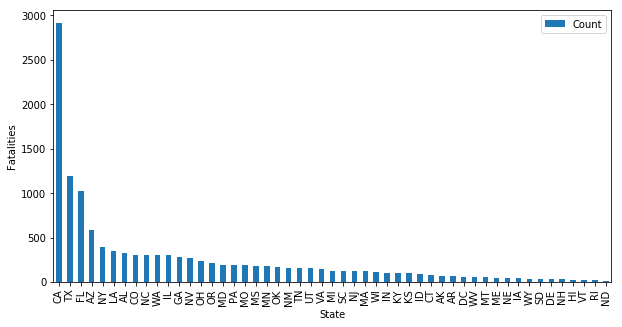

In [261]:
#Bar Graph for State Fatalities
state_frequency.plot.bar(x= 'State', y = 'Count')
plt.rcParams['figure.figsize'] = (18,8)
plt.ylabel('Fatalities')
plt.show

In [262]:
#Month Frequency
month_frequency = Police_DF["Month"].value_counts().reset_index().rename(columns={'index': 'Month', "Month": 'Count'})
month_frequency.head()

,Month,Count
0,March,1167
1,July,1109
2,January,1098
3,April,1097
4,August,1077


<function matplotlib.pyplot.show(*args, **kw)>

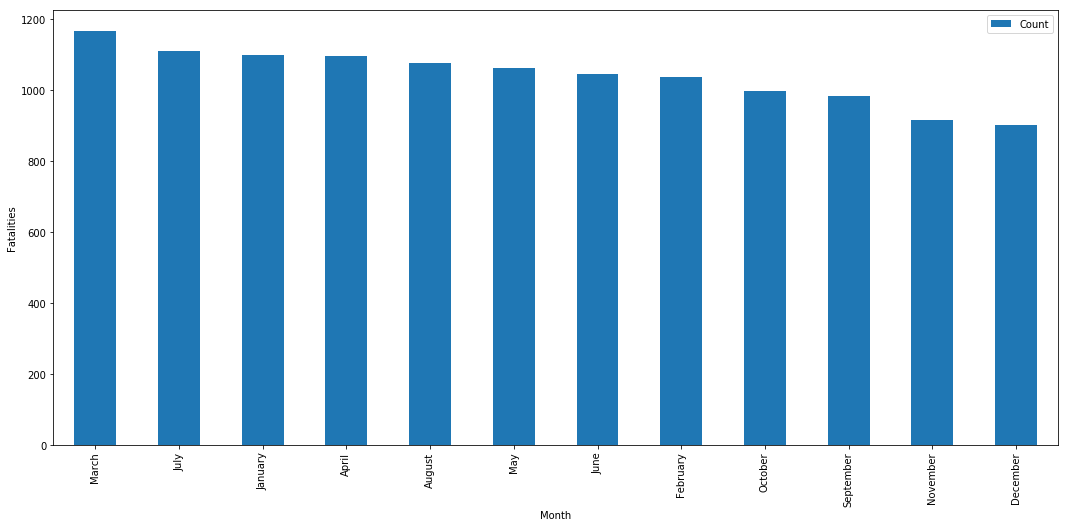

In [263]:
#Bar Graph for State Fatalities
month_frequency.plot.bar(x= 'Month', y = 'Count')
plt.rcParams['figure.figsize'] = (18,8)
plt.ylabel('Fatalities')
plt.show

In [264]:
#State Frequency
deathcause = Police_DF["Manner_of_death"].value_counts().reset_index().rename(columns={'index': 'Manner Of Death', "Manner_of_death": 'Count'})
deathcause.head()

,Manner Of Death,Count
0,Shot,11800
1,Tasered,542
2,Shot and Tasered,120
3,Other,29


<function matplotlib.pyplot.show(*args, **kw)>

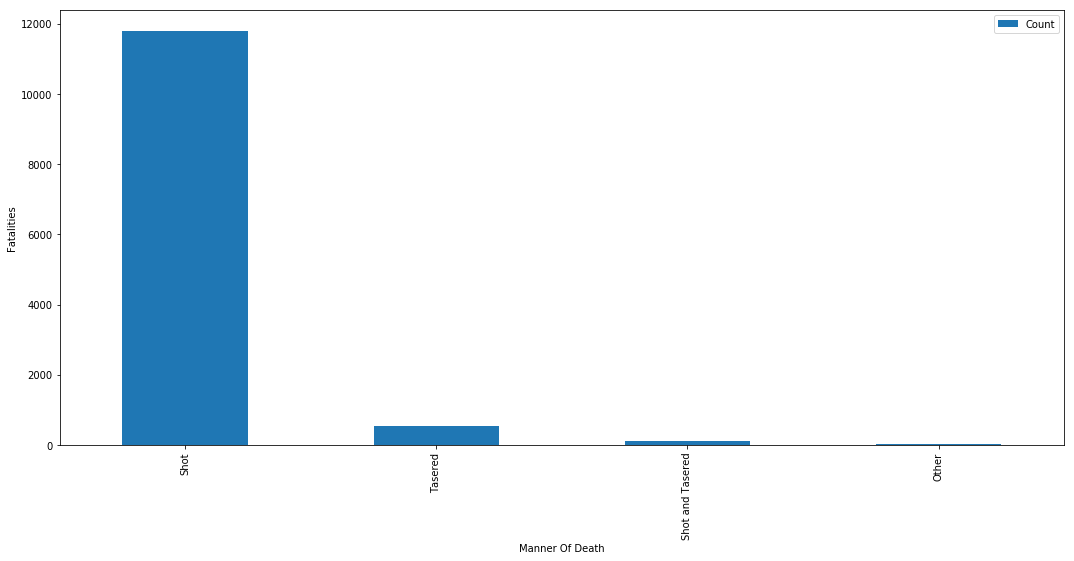

In [265]:
#Bar Graph for Causes of Death
deathcause.plot.bar(x= 'Manner Of Death', y = 'Count')
plt.rcParams['figure.figsize'] = (10,5)
plt.ylabel('Fatalities')
plt.show

In [266]:
# #Count of Fatalities Per Year
YearCount = Police_DF["Year"].value_counts().reset_index().rename(columns={'index': 'Year', "Year": 'Count'})
YearCount

,Year,Count
0,2015,2121
1,2016,1298
2,2013,1081
3,2014,1081
4,2011,779
5,2012,764
6,2010,625
7,2009,597
8,2006,555
9,2008,547


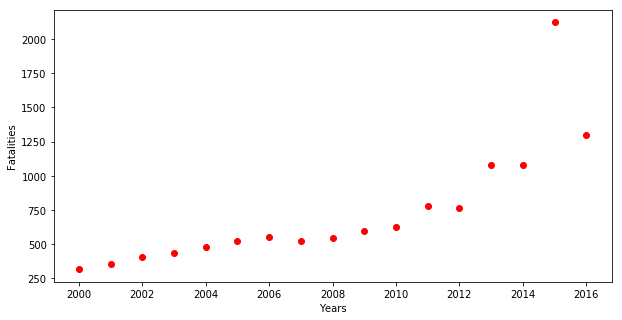

In [267]:
#Count of Fatalities Per Year
plt.plot(YearCount.Year, YearCount.Count, "o", color="r")
plt.ylabel('Fatalities')
plt.xlabel('Years')
plt.show()

In [268]:
#Gender
GenderDF = Police_DF["Gender"].value_counts().reset_index().rename(columns={'index': 'Gender', "Gender": 'Count'})
GenderDF.head()

,Gender,Count
0,Male,11870
1,Female,613
2,Unknown,8


In [269]:
# Labels for the sections of our pie chart
labels = ["Male", "Female", "Unknown"]

# The values of each section of the pie chart
sizes = [11870, 613, 8]

# The colors of each section of the pie chart
colors = ["lightblue", "pink", "red"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, .2, .2)

(-1.1054743649417957,
 1.1082436845106876,
 -1.1037349685911717,
 1.1062732068287757)

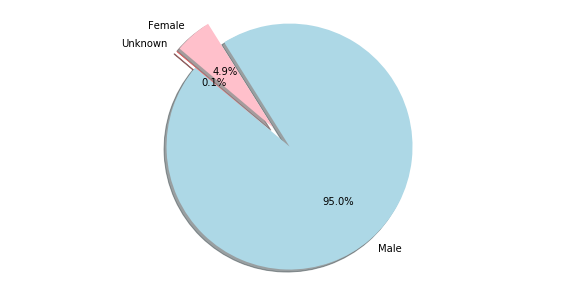

In [270]:
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")